In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,job,education,income,women,prestige,census,type
0,gov.administrators,13.11,12351,11.16,68.8,1113,prof
1,general.managers,12.26,25879,4.02,69.1,1130,prof
2,accountants,12.77,9271,15.70,63.4,1171,prof
3,purchasing.officers,11.42,8865,9.11,56.8,1175,prof
4,chemists,14.62,8403,11.68,73.5,2111,prof


In [4]:
df = df.drop('job', axis = 1)

In [5]:
df = df.fillna('other')

In [6]:
df[df.type == 'other']

,education,income,women,prestige,census,type
33,11.44,8206,8.13,54.1,3373,other
52,9.62,918,7.00,14.8,5143,other
62,9.46,611,96.53,25.9,6147,other
66,6.84,3643,3.60,44.1,7112,other


In [7]:
df = pd.get_dummies(df,prefix=['type'])

In [8]:
df.head()

,education,income,women,prestige,census,type_bc,type_other,type_prof,type_wc
0,13.11,12351,11.16,68.8,1113,0,0,1,0
1,12.26,25879,4.02,69.1,1130,0,0,1,0
2,12.77,9271,15.70,63.4,1171,0,0,1,0
3,11.42,8865,9.11,56.8,1175,0,0,1,0
4,14.62,8403,11.68,73.5,2111,0,0,1,0


In [9]:
X = df[['education','income', 'women','census', 'type_bc', 'type_other','type_prof','type_wc']]
y = df[['prestige']]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=1)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.05, random_state=1)

In [14]:
from sklearn import preprocessing

In [15]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [16]:
X_val

array([[ 1.24734271, -0.12039291,  0.81874227, -1.13485154, -0.84674738,
        -0.21442251,  1.5       , -0.54772256],
       [-0.88536371, -0.48228512, -0.91145438,  1.60914054,  1.18098977,
        -0.21442251, -0.66666667, -0.54772256],
       [-0.2901049 , -0.09158785, -0.48245912,  1.68695641,  1.18098977,
        -0.21442251, -0.66666667, -0.54772256],
       [ 0.23211602, -0.13799601,  0.32593476, -0.40306792, -0.84674738,
        -0.21442251, -0.66666667,  1.82574186],
       [-0.98396487, -0.2440718 , -0.8858663 ,  1.32145761,  1.18098977,
        -0.21442251, -0.66666667, -0.54772256]])

In [20]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg = reg.fit(X_train, y_train)                                       
reg.coef_


array([[10.2000972 ,  4.65385508,  0.3862062 ,  4.50312655, -2.83675077,
        -0.82554553,  4.48945694, -1.1958672 ]])

In [21]:
print(reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [23]:
error = y_train - reg.predict(X_train)
sum_errors = 0
for y in error.values:
    sum_errors = sum_errors + y*y
sigma = sum_errors/(y_train.size - 8 - 1)

mat = np.linalg.inv(np.matmul(np.transpose(X_train),X_train))
coefficients = []
for x in reg.coef_:
    coefficients.append(x)
order3 = []
for x in range(0,len(coefficients)):
    order3.append(np.abs(coefficients[x]/(np.sqrt(sigma*np.abs(mat[x][x])))))
print(order3)


[array([5.22713837, 2.384913  , 0.1979151 , 2.30767071, 1.45372034,
       0.42305878, 2.30066559, 0.6128337 ])]


In [24]:
pd.Series(order3[0])


0    5.227138
1    2.384913
2    0.197915
3    2.307671
4    1.453720
5    0.423059
6    2.300666
7    0.612834
dtype: float64

In [25]:
relevant = []
moderate = []
not_relevant = []
for x in range(len(order3[0])):
    if order3[0][x] >= 1.6:
        relevant.append(X.columns[x])
    elif order3[0][x] >= 1.2:
        moderate.append(X.columns[x])
    else:
        not_relevant.append(X.columns[x])


In [26]:
relevant

['education', 'income', 'census', 'type_prof']

In [27]:
moderate

['type_bc']

In [28]:
not_relevant

['women', 'type_other', 'type_wc']

In [29]:
import matplotlib.pyplot as plt


In [30]:
import seaborn as sns

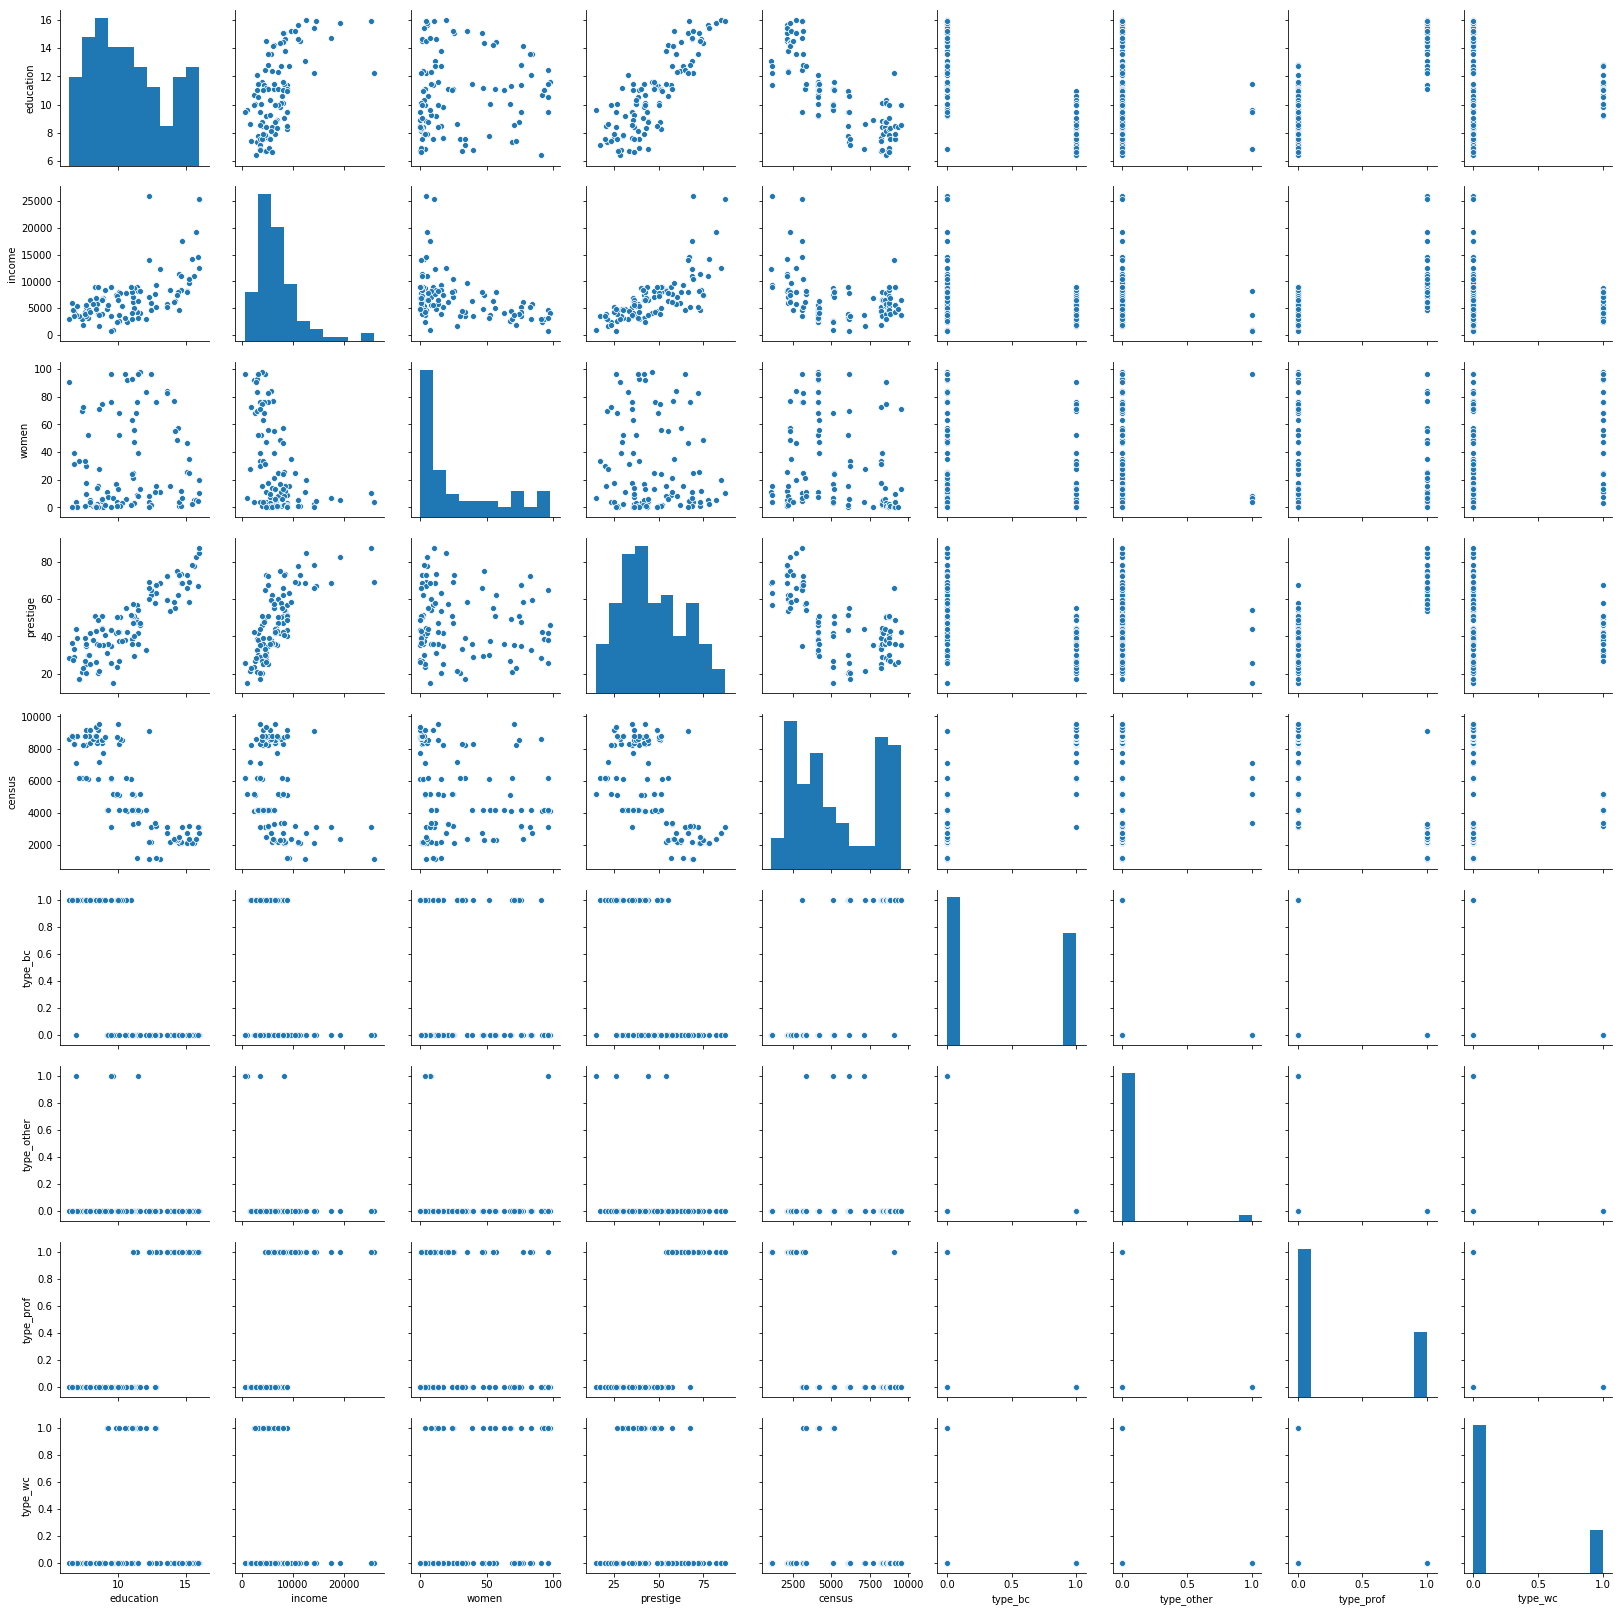

In [31]:
sns.pairplot(df)

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
poly = PolynomialFeatures(2, include_bias = False)
X_train_poly = poly.fit_transform(X_train)

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=15)
pca.fit(X_train_poly)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [36]:
ratios = pca.explained_variance_ratio_
n = 0
sum = 0
for x in ratios:
    if sum < 0.9:
        n = n+1
        sum = sum + x
    else:
        break
        
print(n)

7


In [37]:
pca_data = pd.DataFrame(pca.transform(X_train_poly))
print(pca_data)

           0          1         2         3         4         5         6   \
0   -1.190486   0.380921 -1.992659 -3.308688  0.600899 -1.463899  0.359131   
1   -0.779460  -2.025702 -0.647983  1.251622  0.046605 -0.833639  0.934650   
2   -1.019845  -2.037728 -1.944639  2.072399  0.669670 -1.296085  0.039184   
3   -1.462691   4.334629 -1.739975 -2.933522 -0.048526  0.338204 -0.875805   
4   -0.964382  -1.997353 -1.686260  1.889301  0.302100 -0.960202  0.279861   
5   -0.886777  -1.296972 -1.213470  1.669135 -0.586860  0.198110  0.382362   
6   -0.691100  -1.156351  0.341078  0.723744  0.264764  2.159673 -0.063071   
7   -0.889324  -2.175497 -1.214364  1.688235  0.327104 -1.214942  0.712504   
8   -1.069057   0.269927 -1.347081 -2.921984 -0.273626  0.345107  0.596865   
9   -0.801925  -1.157026 -0.586801  1.614282 -0.684426 -0.254420  0.934541   
10  -1.143313   0.943065 -1.312323 -2.646941 -0.244296  0.111468  0.745076   
11  -1.061831  -0.817866 -2.118528  2.067751 -0.238072  1.097212

In [38]:
pd.Series(pca.components_[0]).sort_values(ascending=False)

38    0.914222
5     0.205477
12    0.057215
36    0.054459
19    0.050194
32    0.036206
37    0.035028
42    0.032650
22    0.032551
23    0.028615
11    0.026822
31    0.020085
15    0.014709
18    0.012896
24    0.011223
3     0.008266
27    0.006938
25    0.006758
10    0.005635
2     0.004367
26    0.002806
17    0.002799
33    0.001910
9    -0.009171
34   -0.011687
21   -0.011961
16   -0.014034
28   -0.016875
7    -0.018751
8    -0.023368
43   -0.023964
14   -0.027426
0    -0.029465
41   -0.030656
4    -0.034965
29   -0.035060
6    -0.036787
30   -0.043865
1    -0.044814
13   -0.106125
40   -0.108524
39   -0.129097
20   -0.160724
35   -0.166490
dtype: float64

In [39]:
arr = np.arange(9).reshape(3,3)
poly.fit_transform(arr)

array([[ 0.,  1.,  2.,  0.,  0.,  0.,  1.,  2.,  4.],
       [ 3.,  4.,  5.,  9., 12., 15., 16., 20., 25.],
       [ 6.,  7.,  8., 36., 42., 48., 49., 56., 64.]])

In [40]:
df

,education,income,women,prestige,census,type_bc,type_other,type_prof,type_wc
0,13.11,12351,11.16,68.8,1113,0,0,1,0
1,12.26,25879,4.02,69.1,1130,0,0,1,0
2,12.77,9271,15.70,63.4,1171,0,0,1,0
3,11.42,8865,9.11,56.8,1175,0,0,1,0
4,14.62,8403,11.68,73.5,2111,0,0,1,0
5,15.64,11030,5.13,77.6,2113,0,0,1,0
6,15.09,8258,25.65,72.6,2133,0,0,1,0
7,15.44,14163,2.69,78.1,2141,0,0,1,0
8,14.52,11377,1.03,73.1,2143,0,0,1,0
9,14.64,11023,0.94,68.8,2153,0,0,1,0
